# Fashion_Mnist dataset using Tensorflow (Coursera lab)

In [1]:
# import labraries 
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# load fashion MNIST dataset using keras
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train , y_train) , (x_test , y_test) = fashion_mnist.load_data()

print('Train shape',x_train.shape) # 60k images
print('Test shape',x_test.shape) #10k images



Train shape (60000, 28, 28)
Test shape (10000, 28, 28)


In [3]:
# labels
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

    0 -> T-shirt/top
    1 -> Trouser
    2 -> Pullover
    3 -> Dress
    4 -> Coat
    5 -> Sandal
    6 -> Shirt
    7 -> Sneaker
    8 -> Bag
    9 -> Ankle boot

label 0
We have  784 pixels
Pixels:
[[  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0  85 185 112   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217 231 205 217 188  34   0   0   0   0   0]
 [  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191 168 190 172 188 175   0   0   0   0   0]
 [  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174 195 185 174 161 175  59   0   0   0   0]
 [  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184 185 172 171 164 174 120   0   0   0   0]
 [  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191 193 190 181 171 172 158   0   0   0   0]
 [  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191 194 188 180 161 161 185   0   0   0   0]
 [  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172 170 164 139 149 162 166  21   0   0   0]
 [  0   0   0   0  79 145 160 214 123 128 15

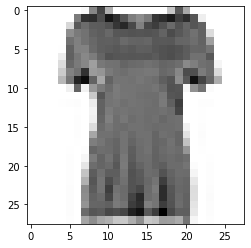

In [4]:
# Visualize the image 
np.set_printoptions(linewidth =320)
index = 10
print('label',y_train[index])
print('We have ' , x_train[index].size, 'pixels')
print('Pixels:')
print( x_train[index])
plt.imshow(x_train[index] , cmap = 'Greys')

In [5]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test /   255.0

In [6]:
class mycallback(tf.keras.callbacks.Callback):
    # chaque fois que une epoch se termine il fait appele à cette fonction
    # logs contient des informations sur l''etat actuelle de l'entrainement
    def on_epoch_end(self , epoch , logs={}):
        # check accuracy 
        if logs.get('loss')<0.4:
             # stop training
            print('loss is  less than 40%  so cancelling training!')
            self.model.stop_training=True
            
            


In [7]:
#  create the  model
callbacks = mycallback()
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128  , activation=tf.nn.relu),
    tf.keras.layers.Dense(units =10 , activation=tf.nn.softmax)
])


In [8]:
# compile the model
model.compile(tf.optimizers.Adam(),loss ='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [9]:
# train  the model with a callback
model.fit(x_train , y_train , epochs=5 , callbacks = [callbacks])

Epoch 1/5
1875/1875 [==============================] - 47s 16ms/step - loss: 0.4892 - accuracy: 0.8255
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3660 - accuracy: 0.8655


In [11]:
# evaluate the model on  the testset 
model.evaluate (x_test , y_test)

313/313 [==============================] - ETA: 0s - loss: 0.3768 - accuracy: 0.86 - 4s 10ms/step - loss: 0.3766 - accuracy: 0.8632


[0.37662380933761597, 0.8632000088691711]

In [19]:
classifications = model.predict(x_test)

print(classifications[215])

[5.1721595e-02 8.2431091e-03 3.5745802e-03 9.1610545e-01 2.8522545e-04 2.2470840e-05 1.6511079e-02 3.8312763e-05 3.4719612e-03 2.6277665e-05]


In [20]:
y_test[215]

3

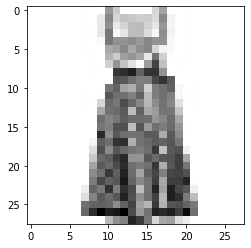

In [22]:
plt.imshow(x_test[215] , cmap = 'Greys')

                                                    THE END 